In [ ]:
# Install dependencies
!pip install -q numerapi pandas pyarrow matplotlib lightgbm scikit-learn cloudpickle==2.2.1 scipy==1.10.1

# Inline plots
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.7 MB/s eta 0:00:00


In [ ]:
# Initialize NumerAPI - the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()

# list the datasets and available versions
all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions:\n", dataset_versions)

# Set data version to one of the latest datasets
DATA_VERSION = "v5.0"

# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("Available", DATA_VERSION, "files:\n", current_version_files)

Available versions:
 ['v5.0']
available v5.0 files:
 ['v5.0/features.json', 'v5.0/live.parquet', 'v5.0/live_benchmark_models.parquet', 'v5.0/live_example_preds.csv', 'v5.0/live_example_preds.parquet', 'v5.0/train.parquet', 'v5.0/train_benchmark_models.parquet', 'v5.0/validation.parquet', 'v5.0/validation_benchmark_models.parquet', 'v5.0/validation_example_preds.csv', 'v5.0/validation_example_preds.parquet']


In [ ]:
import json

# download the feature metadata file
napi.download_dataset(f"{DATA_VERSION}/features.json")

# read the metadata and display
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

v5.0/features.json: 291kB [00:00, 1.07MB/s]                          

feature_sets 17
targets 37


In [ ]:
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

small 42
medium 705
all 2376


In [ ]:
import pandas as pd

# Define our feature set
feature_set = feature_sets["medium"]

# Download the training data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/train.parquet")

# Load only the "medium" feature set to
# Use the "all" feature set to use all features
train = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=["era", "target"] + feature_set
)

# Downsample to every 4th era to reduce memory usage and speedup model training (suggested for Colab free tier)
# Comment out the line below to use all the data
train = train[train["era"].isin(train["era"].unique()[::4])]

v5.0/train.parquet: 2.37GB [01:40, 23.6MB/s]                            


In [ ]:
train

,era,target,feature_able_deprived_nona,feature_ablest_inflexional_egeria,feature_absorbable_hyperalgesic_mode,feature_accoutered_revolute_vexillology,feature_acetose_crackerjack_needlecraft,feature_acheulian_conserving_output,feature_acronychal_bilobate_stevenage,feature_acrylic_gallic_wine,...,feature_working_jain_acromegaly,feature_wrapround_chrestomathic_timarau,feature_xanthic_transpadane_saleswoman,feature_xanthochroid_petrified_gutenberg,feature_zincy_cirrhotic_josh,feature_zippy_trine_diffraction,feature_zonal_snuffly_chemism,feature_zygotic_middlebrow_caribbean,feature_zymolytic_intertidal_privet,feature_zymotic_windswept_cooky
id,,,,,,,,,,,,,,,,,,,,,
n0007b5abb0c3a25,0001,0.25,1,2,3,2,3,2,2,2,...,2,0,3,2,4,3,2,1,0,0
n003bba8a98662e4,0001,0.25,3,2,4,1,0,2,3,2,...,2,0,0,2,0,0,2,0,0,0
n003bee128c2fcfc,0001,0.75,1,2,0,2,4,2,0,2,...,2,3,3,2,2,3,2,2,2,4
n0048ac83aff7194,0001,0.25,1,2,3,4,0,2,3,2,...,2,0,2,1,1,4,2,0,2,1
n0055a2401ba6480,0001,0.25,3,2,3,4,1,2,4,2,...,2,1,3,3,2,4,2,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc2d5e4b79a7ae,0573,0.00,3,3,2,2,3,0,4,3,...,3,3,3,0,3,2,0,4,2,4
nffc9844c1c7a6a9,0573,0.25,0,1,2,1,3,2,2,1,...,1,0,1,1,0,3,0,2,1,2
nffd79773f4109bb,0573,0.50,3,1,1,1,3,2,2,0,...,1,0,2,1,2,4,4,0,1,2


<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

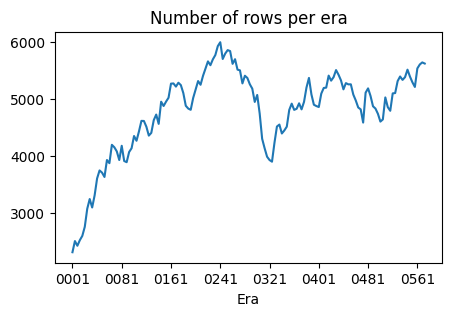

In [ ]:
# Plot the number of rows per era
train.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

<Axes: title={'center': 'Target'}, xlabel='Value', ylabel='Frequency'>

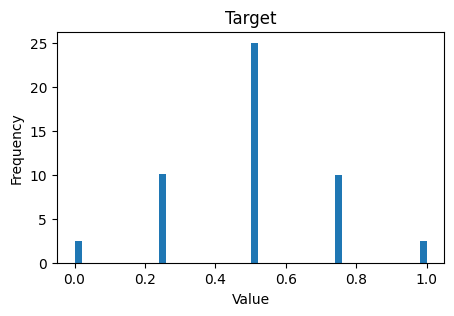

In [19]:
# Plot density histogram of the target
train["target"].plot(
  kind="hist",
  title="Target",
  figsize=(5, 3),
  xlabel="Value",
  density=True,
  bins=50
)

<Axes: title={'center': 'missing data'}, ylabel='Frequency'>

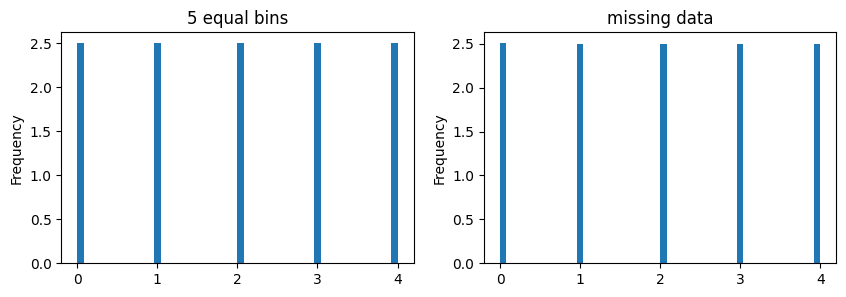

In [20]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
first_era = train[train["era"] == train["era"].unique()[0]]
last_era = train[train["era"] == train["era"].unique()[-1]]
last_era[feature_set[-1]].plot(
   title="5 equal bins",
   kind="hist",
   density=True,
   bins=50,
   ax=ax1
)
first_era[feature_set[-1]].plot(
   title="missing data",
   kind="hist",
   density=True,
   bins=50,
   ax=ax2
)

In [21]:
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
import lightgbm as lgb

# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
model = lgb.LGBMRegressor(
  n_estimators=2000,
  learning_rate=0.01,
  max_depth=5,
  num_leaves=2**5-1,
  colsample_bytree=0.1
)
# The following "deep" parameters perform much better, but they require much more CPU and RAM
# model = lgb.LGBMRegressor(
#     n_estimators=30_000,
#     learning_rate=0.001,
#     max_depth=10,
#     num_leaves=2**10,
#     colsample_bytree=0.1
#     min_data_in_leaf=10000,
# )

# This will take a few minutes 🍵
model.fit(
  train[feature_set],
  train["target"]
)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3525
[LightGBM] [Info] Number of data points in the train set: 688184, number of used features: 705
[LightGBM] [Info] Start training from score 0.500008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=2000)

In [22]:
# Download validation data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/validation.parquet")

# Load the validation data and filter for data_type == "validation"
validation = pd.read_parquet(
    f"{DATA_VERSION}/validation.parquet",
    columns=["era", "data_type", "target"] + feature_set
)
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]

# Downsample to every 4th era to reduce memory usage and speedup evaluation (suggested for Colab free tier)
# Comment out the line below to use all the data (slower and higher memory usage, but more accurate evaluation)
validation = validation[validation["era"].isin(validation["era"].unique()[::4])]

# Eras are 1 week apart, but targets look 20 days (o 4 weeks/eras) into the future,
# so we need to "embargo" the first 4 eras following our last train era to avoid "data leakage"
last_train_era = int(train["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validation = validation[~validation["era"].isin(eras_to_embargo)]

# Generate predictions against the out-of-sample validation features
# This will take a few minutes 🍵
validation["prediction"] = model.predict(validation[feature_set])
validation[["era", "prediction", "target"]]

v5.0/validation.parquet: 3.32GB [02:48, 19.7MB/s]                            


,era,prediction,target
id,,,
n000c290e4364875,0579,0.491249,0.50
n002a15bc5575bbb,0579,0.505177,0.25
n00309caaa0f955e,0579,0.517842,0.75
n0039cbdcf835708,0579,0.495611,0.50
n004143458984f89,0579,0.496297,0.50
...,...,...,...
nffd8a0f19182034,1147,0.500244,0.50
nffebe5dca2dbf6d,1147,0.494778,0.50
nfff979264dea087,1147,0.507936,0.50


In [23]:
# install Numerai's open-source scoring tools
!pip install -q --no-deps numerai-tools

# import the 2 scoring functions
from numerai_tools.scoring import numerai_corr, correlation_contribution

# Download and join in the meta_model for the validation eras
napi.download_dataset(f"v4.3/meta_model.parquet", round_num=842)
validation["meta_model"] = pd.read_parquet(
    f"v4.3/meta_model.parquet"
)["numerai_meta_model"]

v4.3/meta_model.parquet: 29.0MB [00:02, 12.6MB/s]                            


<ipython-input-24-cdfc747f999e>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corr = validation.groupby("era").apply(
<ipython-input-24-cdfc747f999e>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_mmc = validation.dropna().groupby("era").apply(


<Axes: title={'center': 'Validation MMC'}, xlabel='era'>

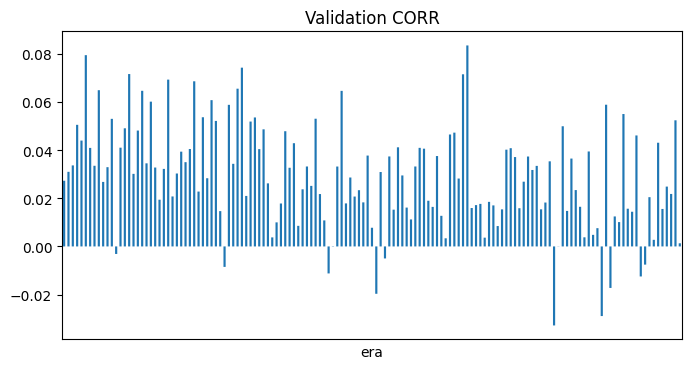

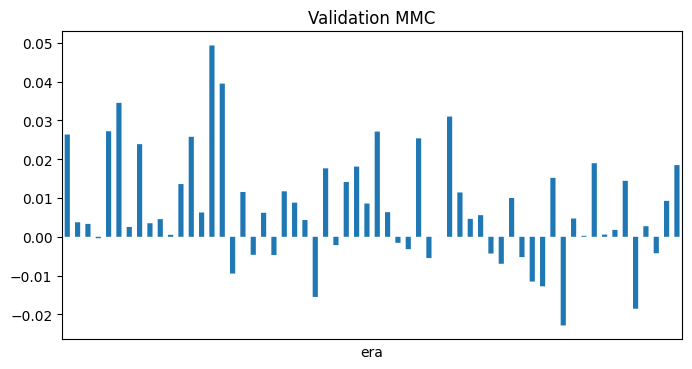

In [24]:
# Compute the per-era corr between our predictions and the target values
per_era_corr = validation.groupby("era").apply(
    lambda x: numerai_corr(x[["prediction"]].dropna(), x["target"].dropna())
)

# Compute the per-era mmc between our predictions, the meta model, and the target values
per_era_mmc = validation.dropna().groupby("era").apply(
    lambda x: correlation_contribution(x[["prediction"]], x["meta_model"], x["target"])
)


# Plot the per-era correlation
per_era_corr.plot(
  title="Validation CORR",
  kind="bar",
  figsize=(8, 4),
  xticks=[],
  legend=False,
  snap=False
)
per_era_mmc.plot(
  title="Validation MMC",
  kind="bar",
  figsize=(8, 4),
  xticks=[],
  legend=False,
  snap=False
)

<Axes: title={'center': 'Cumulative Validation MMC'}, xlabel='era'>

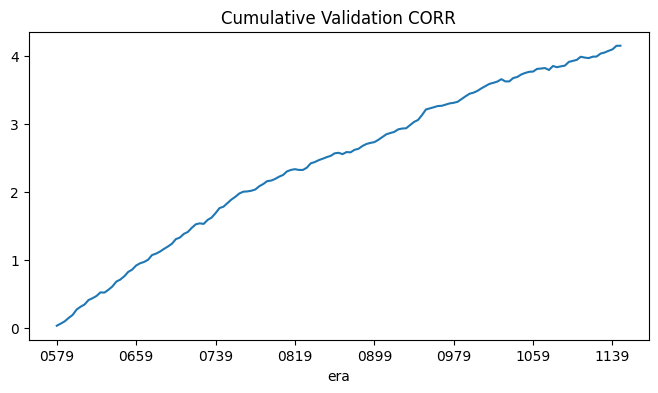

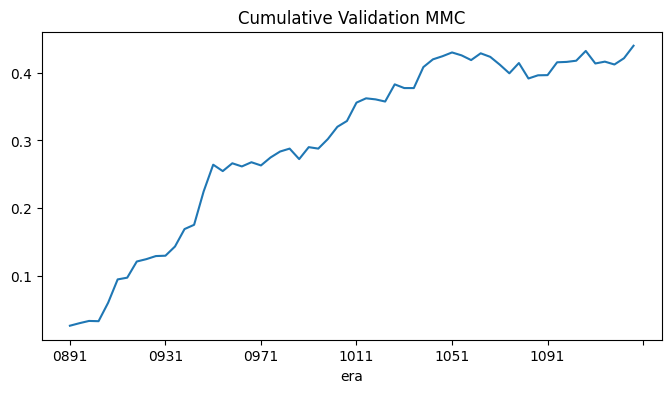

In [25]:
# Plot the cumulative per-era correlation
per_era_corr.cumsum().plot(
  title="Cumulative Validation CORR",
  kind="line",
  figsize=(8, 4),
  legend=False
)
per_era_mmc.cumsum().plot(
  title="Cumulative Validation MMC",
  kind="line",
  figsize=(8, 4),
  legend=False
)

In [26]:
# Compute performance metrics
corr_mean = per_era_corr.mean()
corr_std = per_era_corr.std(ddof=0)
corr_sharpe = corr_mean / corr_std
corr_max_drawdown = (per_era_corr.cumsum().expanding(min_periods=1).max() - per_era_corr.cumsum()).max()

mmc_mean = per_era_mmc.mean()
mmc_std = per_era_mmc.std(ddof=0)
mmc_sharpe = mmc_mean / mmc_std
mmc_max_drawdown = (per_era_mmc.cumsum().expanding(min_periods=1).max() - per_era_mmc.cumsum()).max()

pd.DataFrame({
    "mean": [corr_mean, mmc_mean],
    "std": [corr_std, mmc_std],
    "sharpe": [corr_sharpe, mmc_sharpe],
    "max_drawdown": [corr_max_drawdown, mmc_max_drawdown]
}, index=["CORR", "MMC"]).T

,CORR,MMC
mean,prediction 0.029027 dtype: float64,prediction 0.007333 dtype: float64
std,prediction 0.021829 dtype: float64,prediction 0.014054 dtype: float64
sharpe,prediction 1.329721 dtype: float64,prediction 0.521759 dtype: float64
max_drawdown,prediction 0.032897 dtype: float64,prediction 0.038468 dtype: float64


In [27]:
# Download latest live features
napi.download_dataset(f"{DATA_VERSION}/live.parquet")

# Load live features
live_features = pd.read_parquet(f"{DATA_VERSION}/live.parquet", columns=feature_set)

# Generate live predictions
live_predictions = model.predict(live_features[feature_set])

# Format submission
pd.Series(live_predictions, index=live_features.index).to_frame("prediction")

v5.0/live.parquet: 7.80MB [00:01, 5.58MB/s]                            


,prediction
id,
n00049a9ab73343d,0.484874
n000a3638a0bb390,0.506122
n001c34636a53fd8,0.515175
n001c716892be404,0.507482
n001e068215b2e06,0.488007
...,...
nffddb5d88eac837,0.516501
nffe2864d87608a4,0.495884
nffe68d1b4270d67,0.511261


In [28]:
# Define your prediction pipeline as a function
def predict(live_features: pd.DataFrame) -> pd.DataFrame:
    live_predictions = model.predict(live_features[feature_set])
    submission = pd.Series(live_predictions, index=live_features.index)
    return submission.to_frame("prediction")

In [29]:
# Use the cloudpickle library to serialize your function
import cloudpickle
p = cloudpickle.dumps(predict)
with open("hello_numerai.pkl", "wb") as f:
    f.write(p)

In [30]:
# Download file if running in Google Colab
try:
    from google.colab import files
    files.download('hello_numerai.pkl')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>